# **1. Perkenalan Dataset**


Dataset yang digunakan adalah [Air Quality Index in Jakarta](https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021), dengan penjelasan setiap kolomnya sebagai berikut:


| **Nama Kolom** | **Deskripsi** |
|----------------|---------------|
| **tanggal** | Tanggal pencatatan data kualitas udara (format: `YYYY-MM-DD`). Contoh: `2010-01-01`. |
| **stasiun** | Nama/kode stasiun pemantauan kualitas udara. Misalnya: `DKI1 (Bunderan HI)` menandakan lokasi pemantauan berada di Bundaran HI, Jakarta. |
| **pm10** | Konsentrasi partikel udara berukuran ≤10 mikrometer (µg/m³). Partikel ini bisa masuk ke saluran pernapasan atas dan menyebabkan gangguan kesehatan. |
| **pm25** | Konsentrasi partikel udara berukuran ≤2.5 mikrometer (µg/m³). Lebih kecil dari PM10, partikel ini bisa masuk lebih dalam ke paru-paru. |
| **so2** | Konsentrasi gas **Sulfur Dioksida (SO₂)** dalam udara (µg/m³). Berasal dari pembakaran bahan bakar fosil, bisa menyebabkan iritasi saluran napas. |
| **co** | Konsentrasi **Karbon Monoksida (CO)** dalam udara (µg/m³). Gas beracun hasil pembakaran tidak sempurna bahan bakar. |
| **o3** | Konsentrasi **Ozon (O₃)** permukaan dalam udara (µg/m³). Meskipun ozon di atmosfer atas melindungi bumi, ozon di permukaan bisa berbahaya bagi kesehatan. |
| **no2** | Konsentrasi **Nitrogen Dioksida (NO₂)** dalam udara (µg/m³). Umumnya berasal dari emisi kendaraan dan industri. |
| **max** | Nilai tertinggi dari semua parameter pencemar udara pada hari tersebut. Contoh: `73.0` (nilai tertinggi dari parameter CO). |
| **critical** | Parameter polutan yang paling dominan pada hari tersebut, yaitu yang memiliki nilai **max**. Misal: `CO`. |
| **categori** | Kategori kualitas udara berdasarkan parameter **max**. Contoh: `SEDANG` berarti kualitas udara cukup baik tetapi dapat berdampak bagi kelompok sensitif. |

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import urllib
import missingno as msno
import seaborn as sns
from scipy import stats
from astropy.coordinates import SkyCoord
from astropy import units as u
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import joblib

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('ispu_dki_all.csv')

# **4. Exploratory Data Analysis (EDA)**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [4]:
df.shape

(4626, 11)

In [5]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [6]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


In [7]:
df.isna().sum()

,0
tanggal,0
stasiun,0
pm10,160
pm25,3903
so2,19
co,8
o3,5
no2,8
max,0
critical,1


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
tanggal,4626
stasiun,5
pm10,131
pm25,123
so2,87
co,94
o3,264
no2,75
max,244
critical,6


In [10]:
numerical_cols = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']

In [11]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,166
pm25,7
so2,77
co,129
o3,203
no2,190
max,246


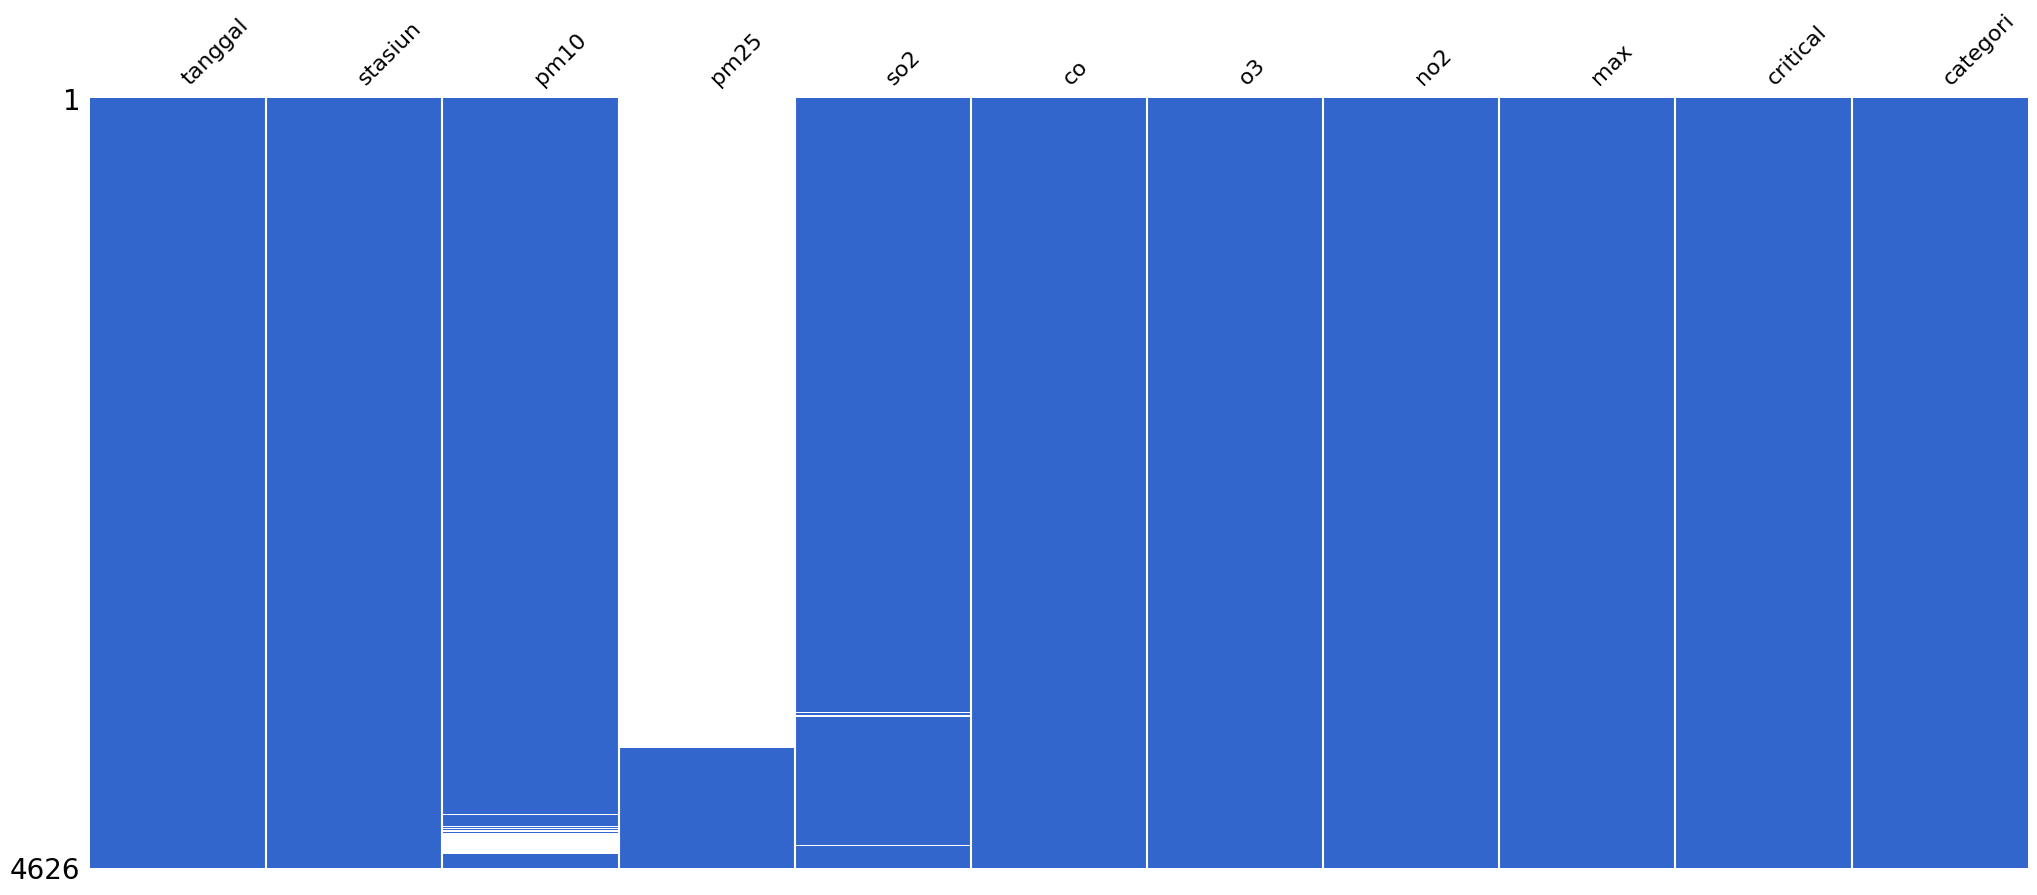

In [12]:
# Atur palet warna seaborn
sns.set_palette("coolwarm")

# Visualisasi matriks missing values dengan warna
msno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.8))  # Warna biru
plt.show()

/tmp/ipython-input-13-3504129776.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dupe_counts.index, y=dupe_counts.values, palette=["skyblue", "salmon"])


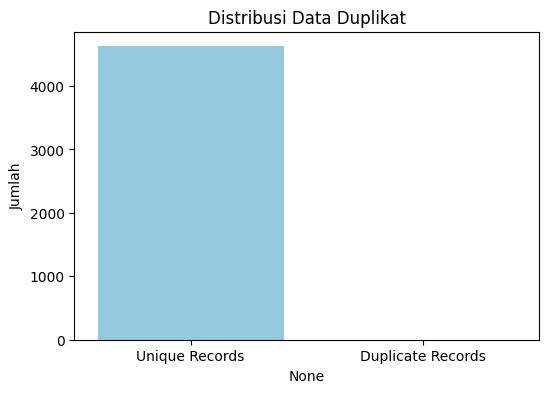

In [13]:
duplicates = df.duplicated(keep=False)
df_dupes = df[duplicates]

# Hitung jumlah data asli dan duplikat
dupe_counts = pd.Series({
    "Unique Records": len(df) - df_dupes.shape[0],
    "Duplicate Records": df_dupes.shape[0]
})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=dupe_counts.index, y=dupe_counts.values, palette=["skyblue", "salmon"])
plt.ylabel("Jumlah")
plt.title("Distribusi Data Duplikat")
plt.show()

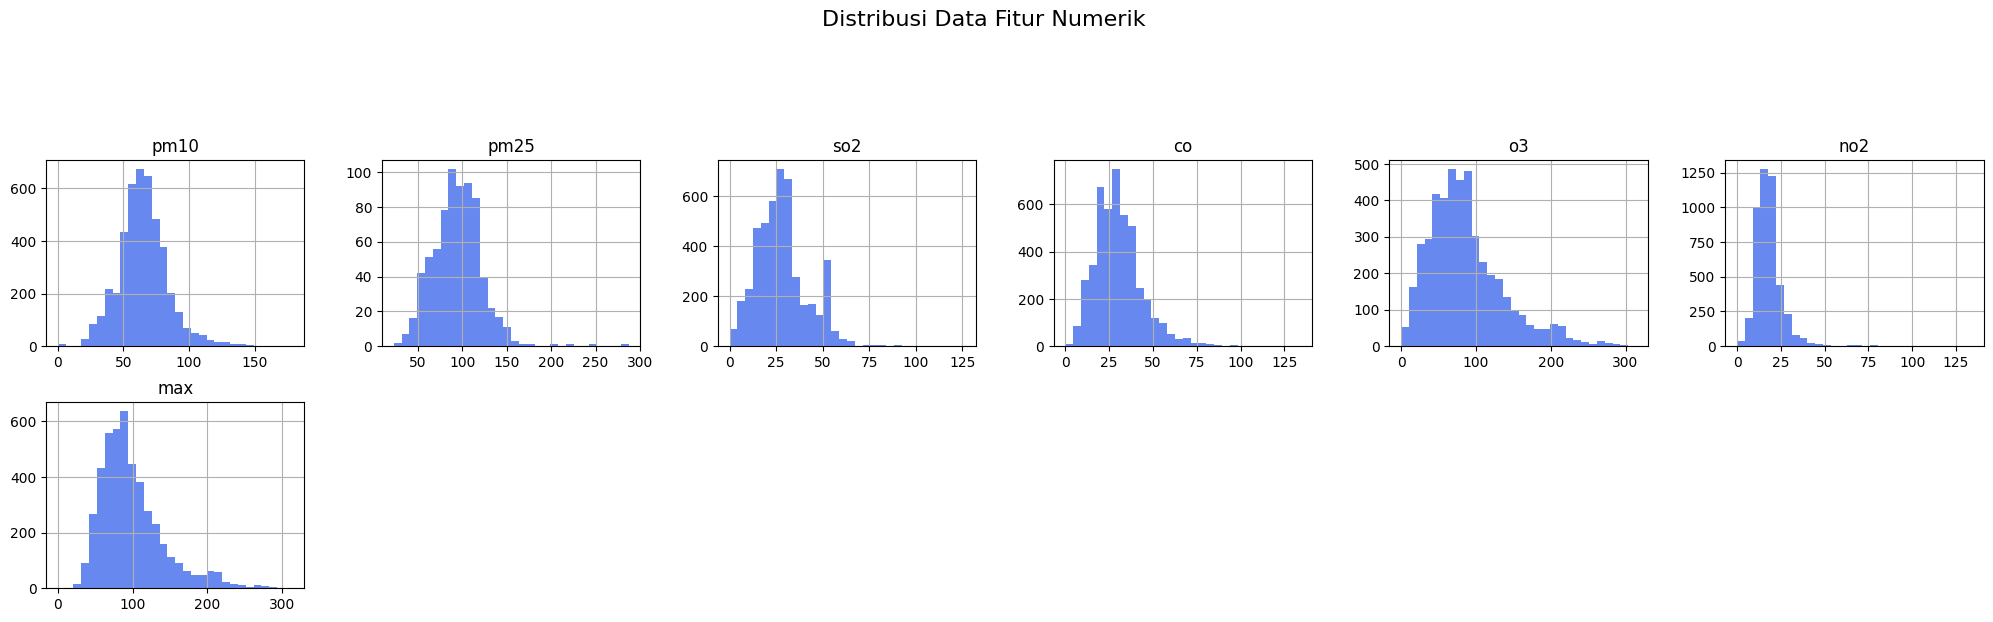

In [14]:
df[numerical_cols].hist(figsize=(25, 15), bins=30, layout=(5, 6))
plt.suptitle("Distribusi Data Fitur Numerik", fontsize=16)
plt.show()

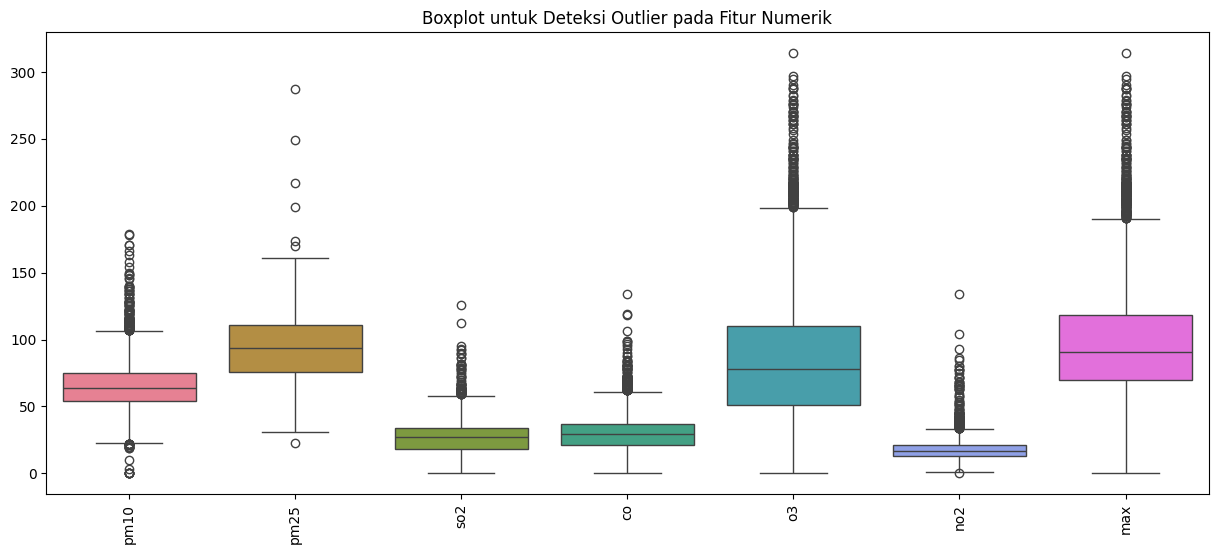

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

<Axes: >

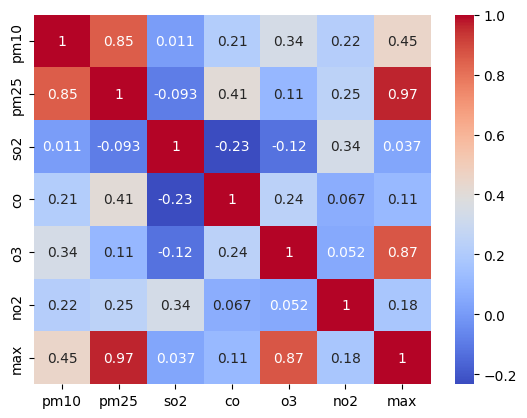

In [16]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')

In [17]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

Text(0.5, 1.0, 'Tren Harian PM10, PM2.5, dan CO')

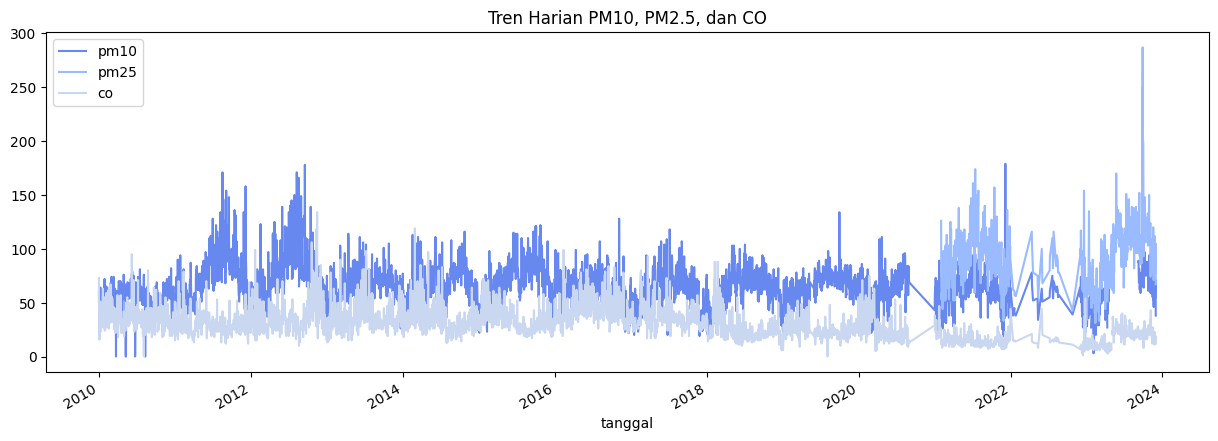

In [18]:
df.set_index('tanggal')[['pm10', 'pm25', 'co']].plot(figsize=(15, 5))
plt.title('Tren Harian PM10, PM2.5, dan CO')

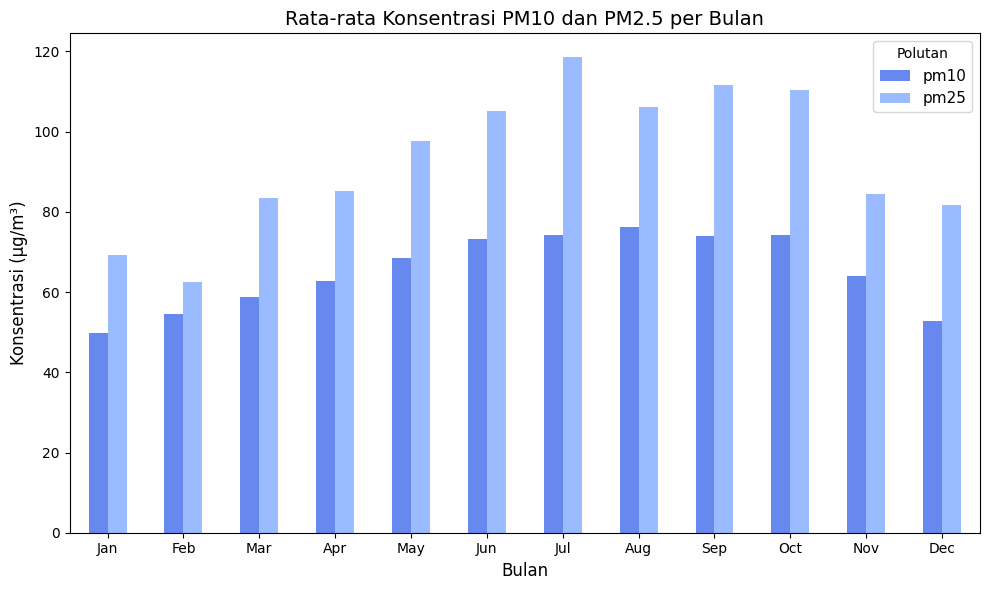

In [19]:
import calendar

# Tambahkan kolom nama bulan (jika belum)
df['bulan'] = df['tanggal'].dt.month
df['nama_bulan'] = df['tanggal'].dt.strftime('%b')  # 'Jan', 'Feb', dst.

# Hitung rata-rata per nama bulan
bulan_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']

df.groupby('nama_bulan')[['pm10', 'pm25']].mean().reindex(bulan_order).plot(kind='bar', figsize=(10, 6))

# Plotting
plt.title('Rata-rata Konsentrasi PM10 dan PM2.5 per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Polutan', fontsize=11)
plt.tight_layout()
plt.show()

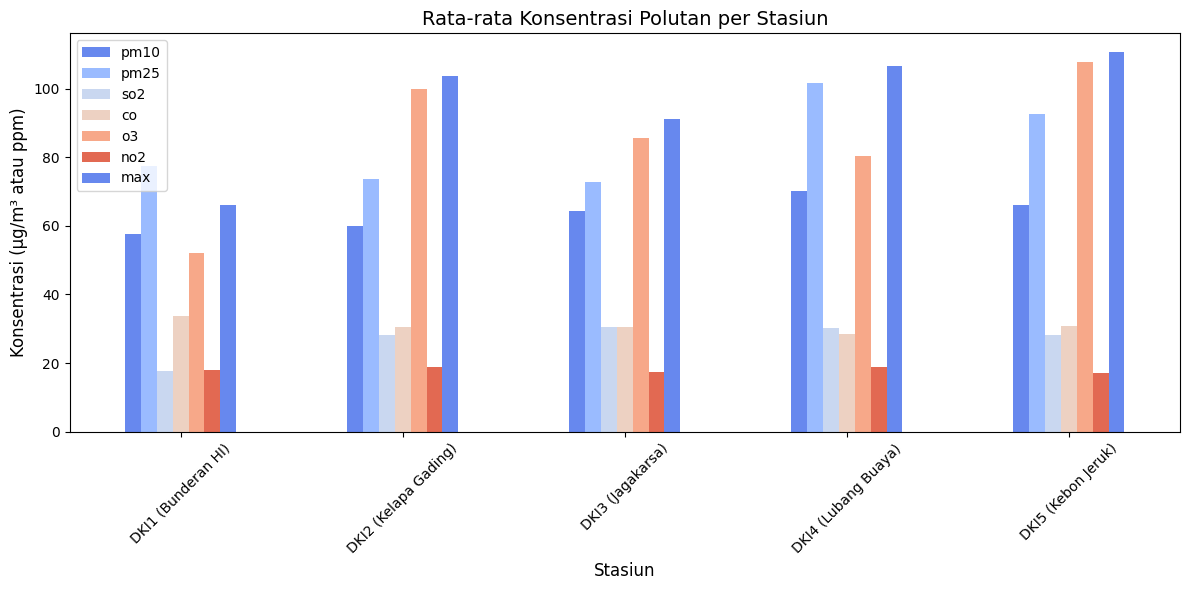

In [20]:
df.groupby('stasiun')[numerical_cols].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Konsentrasi Polutan per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³ atau ppm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

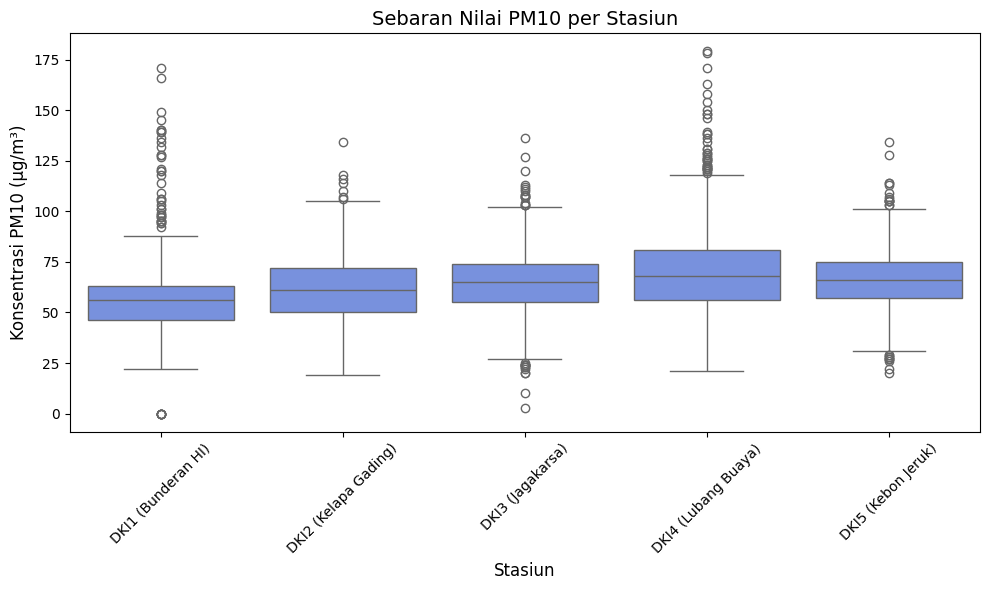

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stasiun', y='pm10', data=df)
plt.title('Sebaran Nilai PM10 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Konsentrasi PM10 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

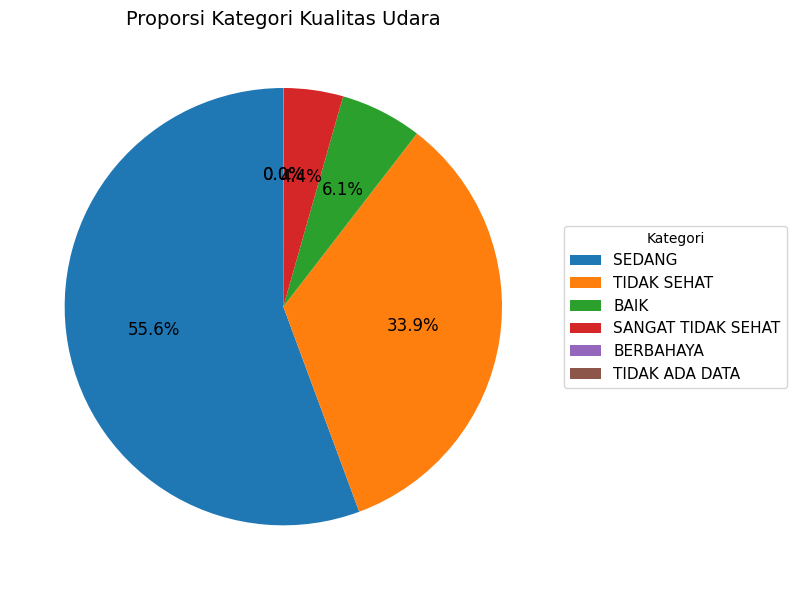

In [22]:
kategori_counts = df['categori'].value_counts()
labels = kategori_counts.index
sizes = kategori_counts.values

# Warna konsisten dari colormap (misal: viridis atau tab10)
colors = plt.cm.tab10(range(len(sizes)))

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # label tidak langsung ditampilkan di pie
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Tambahkan legend dengan warna yang konsisten
ax.legend(
    wedges,
    labels,
    title="Kategori",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Judul
plt.title('Proporsi Kategori Kualitas Udara', fontsize=14)
plt.tight_layout()
plt.show()

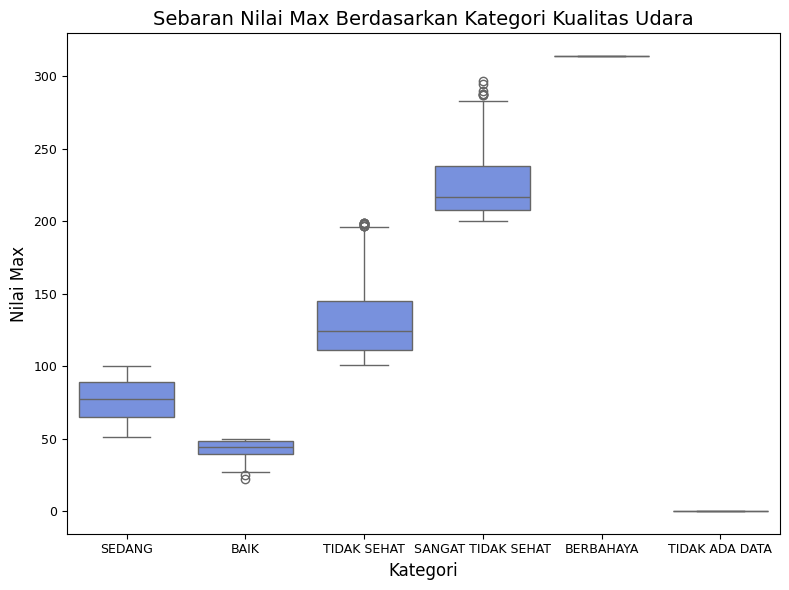

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='categori', y='max', data=df)
plt.title('Sebaran Nilai Max Berdasarkan Kategori Kualitas Udara', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Nilai Max', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

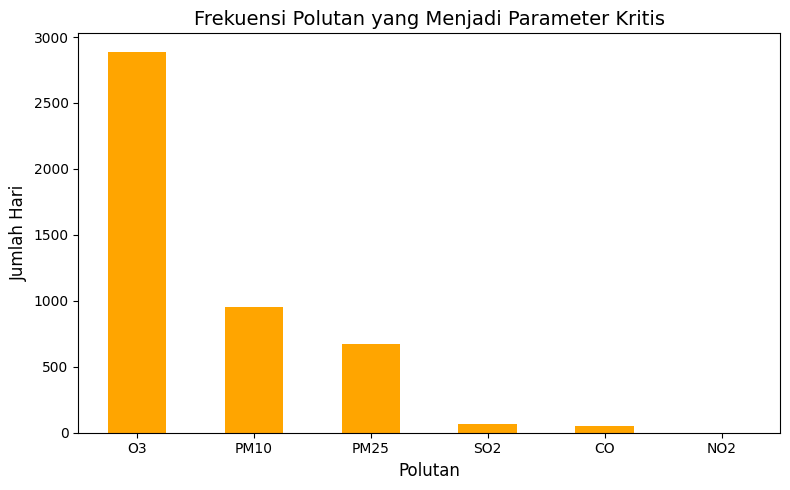

In [24]:
df['critical'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Frekuensi Polutan yang Menjadi Parameter Kritis', fontsize=14)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

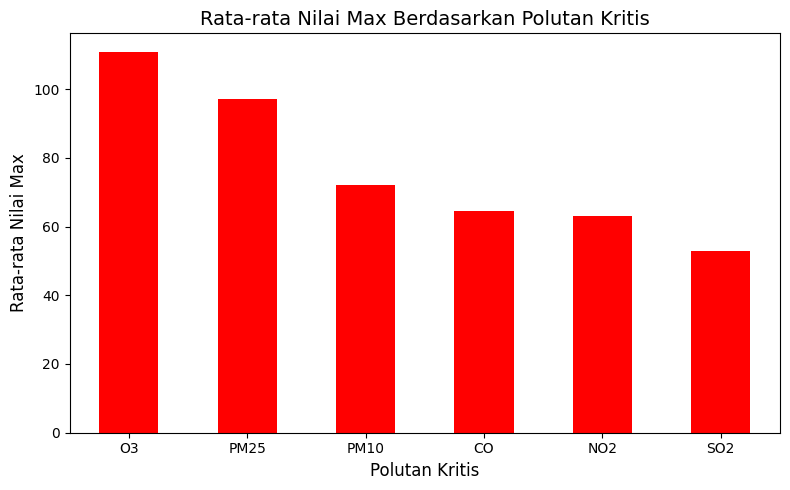

In [25]:
df.groupby('critical')['max'].mean().sort_values(ascending=False).plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Rata-rata Nilai Max Berdasarkan Polutan Kritis', fontsize=14)
plt.xlabel('Polutan Kritis', fontsize=12)
plt.ylabel('Rata-rata Nilai Max', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight dari Exploratory Data Analysis (EDA)

Berdasarkan hasil EDA terhadap dataset kualitas udara di **Jakarta**, diperoleh beberapa temuan penting sebagai berikut:

---

#### 1. Data Missing dan Duplikat
- Ditemukan beberapa **missing values**, terutama pada kolom polutan.
- Visualisasi **missing value matrix** membantu mengidentifikasi pola hilangnya data.
- Ditemukan juga data **duplikat** yang perlu ditangani sebelum pemodelan.

---

#### 2. Distribusi Data Numerik
- **Histogram** menunjukkan sebagian besar data numerik (`pm10`, `pm25`, `so2`, `co`, `o3`, `no2`, `max`) tidak berdistribusi normal.
- Beberapa fitur menunjukkan adanya **outlier signifikan**, yang dikonfirmasi melalui **boxplot**.

---

#### 3. Korelasi Antar Fitur
- **Heatmap korelasi** menunjukkan adanya hubungan yang kuat antar beberapa polutan.
- Hal ini mengindikasikan potensi **multikolinearitas**, yang perlu diperhatikan saat membuat model prediksi.

---

#### 4. Tren Kualitas Udara
- **Tren harian** untuk `pm10`, `pm25`, dan `co` memperlihatkan fluktuasi konsentrasi polutan.
- **Rata-rata bulanan** memperlihatkan pola musiman, dengan peningkatan konsentrasi pada bulan-bulan tertentu.

---

#### 5. Perbedaan Antar Stasiun
- Kualitas udara **bervariasi antar stasiun pemantauan**.
- Visualisasi **rata-rata polutan per stasiun** serta **sebaran PM10** menunjukkan adanya perbedaan yang signifikan.

---

#### 6. Kategori Kualitas Udara
- Sebagian besar hari masuk dalam kategori tertentu berdasarkan indeks kualitas udara.
- **Boxplot per kategori** menunjukkan sebaran nilai `max`, yang menggambarkan konsentrasi polutan maksimum setiap harinya.

---

#### 7. Polutan Kritis
- Polutan **CO** sering muncul sebagai **polutan kritis**, diikuti oleh polutan lainnya.
- Nilai rata-rata `max` bervariasi tergantung pada jenis polutan kritis yang muncul.

---

### Kesimpulan Awal

Dataset kualitas udara ini **layak digunakan untuk pemodelan prediktif**, namun perlu dilakukan beberapa tahapan pembersihan dan transformasi data:

- Penanganan **missing values**, **duplikat**, dan **outlier**
- Transformasi untuk **menormalkan distribusi data**
- Memperhatikan **tren musiman** dan **perbedaan antar stasiun**

Analisis ini menjadi dasar penting dalam pengembangan model prediksi kualitas udara yang lebih akurat dan andal.

# **5. Data Preprocessing**

In [26]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     4626 non-null   datetime64[ns]
 1   stasiun     4626 non-null   object        
 2   pm10        4466 non-null   float64       
 3   pm25        723 non-null    float64       
 4   so2         4607 non-null   float64       
 5   co          4618 non-null   float64       
 6   o3          4621 non-null   float64       
 7   no2         4618 non-null   float64       
 8   max         4626 non-null   float64       
 9   critical    4625 non-null   object        
 10  categori    4626 non-null   object        
 11  bulan       4626 non-null   int32         
 12  nama_bulan  4626 non-null   object        
dtypes: datetime64[ns](1), float64(7), int32(1), object(4)
memory usage: 451.9+ KB


In [28]:
df.drop(columns=['bulan', 'nama_bulan'], inplace=True)

In [29]:
df[numerical_cols] = df[numerical_cols].interpolate(method='linear')

In [30]:
df['critical'].fillna(df['critical'].mode()[0], inplace=True)

/tmp/ipython-input-30-240282409.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critical'].fillna(df['critical'].mode()[0], inplace=True)


In [31]:
df.isna().sum()

,0
tanggal,0
stasiun,0
pm10,0
pm25,3666
so2,0
co,0
o3,0
no2,0
max,0
critical,0


In [32]:
df.drop(columns=['pm25'], inplace=True)

In [33]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4626 non-null   datetime64[ns]
 1   stasiun   4626 non-null   object        
 2   pm10      4626 non-null   float64       
 3   so2       4626 non-null   float64       
 4   co        4626 non-null   float64       
 5   o3        4626 non-null   float64       
 6   no2       4626 non-null   float64       
 7   max       4626 non-null   float64       
 8   critical  4626 non-null   object        
 9   categori  4626 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 361.5+ KB


In [35]:
new_numerical_cols = ['pm10','so2', 'co', 'o3', 'no2', 'max']

In [36]:
Q1 = df[new_numerical_cols].quantile(0.25)
Q3 = df[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[new_numerical_cols] < lower_bound) | (df[new_numerical_cols] > upper_bound)).any(axis=1)].copy()

In [37]:
Q1 = df_cleaned[new_numerical_cols].quantile(0.25)
Q3 = df_cleaned[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_cleaned[new_numerical_cols] < lower_bound) | (df_cleaned[new_numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,18
so2,17
co,0
o3,34
no2,53
max,63


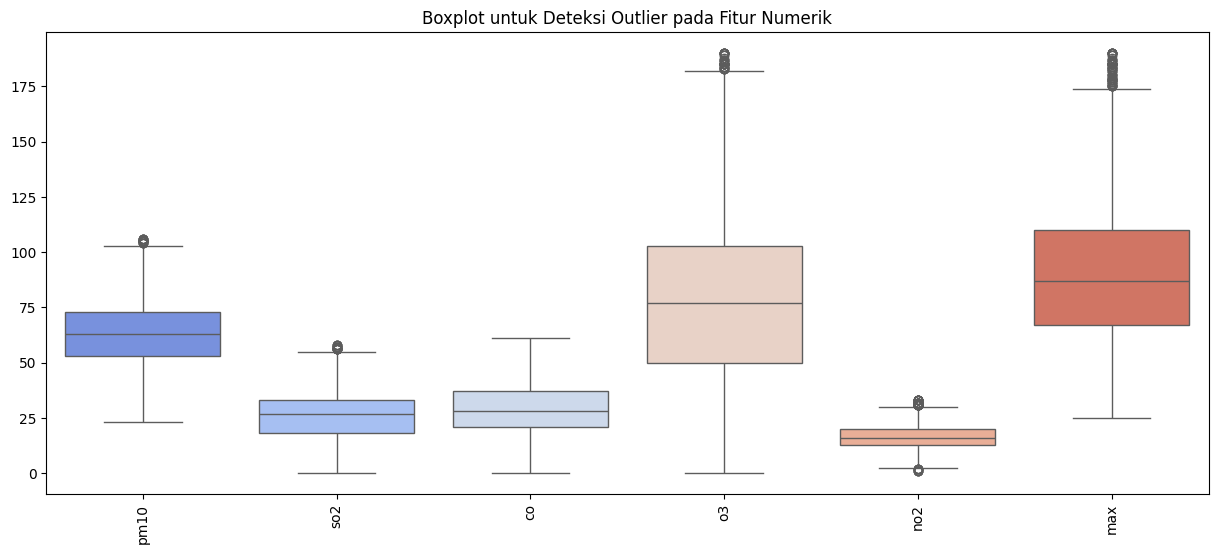

In [38]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned[new_numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

In [39]:
new_numerical_col = ['pm10','so2','o3', 'no2', 'max']

In [40]:
Q1 = df_cleaned[new_numerical_col].quantile(0.25)
Q3 = df_cleaned[new_numerical_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[~((df_cleaned[new_numerical_col] < lower_bound) | (df_cleaned[new_numerical_col] > upper_bound)).any(axis=1)].copy()

In [41]:
Q1 = df_cleaned[new_numerical_cols].quantile(0.25)
Q3 = df_cleaned[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_cleaned[new_numerical_cols] < lower_bound) | (df_cleaned[new_numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,0
so2,0
co,0
o3,0
no2,0
max,16


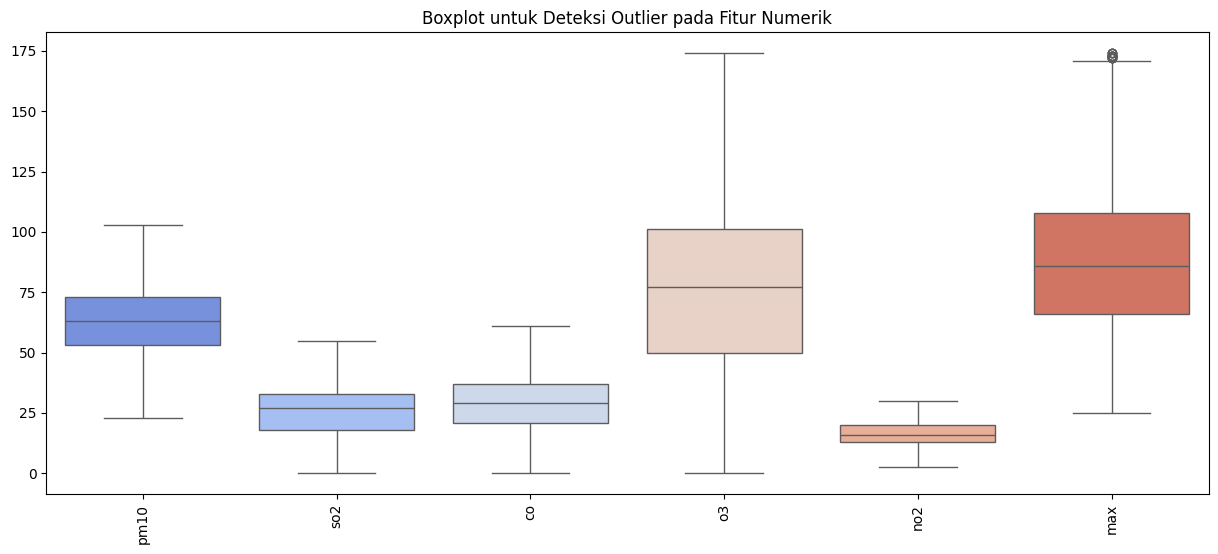

In [42]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned[new_numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

In [43]:
label_encoder = LabelEncoder()

# Loop melalui kolom kategorikal dan lakukan label encoding
for col in ['stasiun','critical','categori']:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [44]:
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
columns_to_scale = df_cleaned.columns.difference(['tanggal'])
df_scaled[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

### Insight dari Data Preprocessing

---

#### 1. Penanganan Nilai Hilang (Missing Value)

- Interpolasi linier digunakan untuk mengisi nilai hilang pada fitur numerik seperti `pm10`, `pm25`, `so2`, `co`, `o3`, `no2`, dan `max`.
- Nilai modus digunakan untuk mengisi nilai hilang pada kolom kategorikal `critical`.
- Kolom `pm25` dihapus karena memiliki banyak nilai hilang dan korelasi yang tinggi dengan fitur lain, yang berpotensi mempengaruhi akurasi model.

---

#### 2. Penanganan Outlier

- Metode IQR digunakan beberapa kali untuk mengidentifikasi dan menghapus outlier dari fitur numerik.
- Outlier memberikan dampak signifikan terhadap data. Visualisasi boxplot setelah penerapan IQR menunjukkan perbaikan, namun perlu investigasi lanjutan agar tidak ada data penting yang ikut terhapus.

---

#### 3. Encoding Fitur Kategorikal

- Label encoding diterapkan pada kolom kategorikal: `stasiun`, `critical`, dan `categori`.
- Penting untuk dicatat bahwa metode ini menciptakan hubungan ordinal, yang mungkin tidak cocok untuk semua jenis model.

---

#### 4. Normalisasi Fitur (Feature Scaling)

- StandardScaler digunakan untuk melakukan standarisasi fitur numerik.
- Langkah ini penting untuk model yang sensitif terhadap skala fitur agar fitur dengan nilai besar tidak mendominasi model.

---

#### 5. Penyimpanan Data

- Data hasil preprocessing (`df_scaled`) disimpan dalam file `polutan.csv`.
- Objek scaler disimpan menggunakan `joblib` dalam file `scaler.pkl` untuk digunakan saat inferensi atau prediksi.

---

### Pertimbangan Lanjutan

- Pemilihan interpolasi linier dan imputasi modus untuk nilai hilang dapat dievaluasi lebih lanjut.
- Metode deteksi outlier tambahan bisa dipertimbangkan dengan hati-hati untuk meminimalisir kehilangan informasi penting.
- Alternatif encoding seperti one-hot encoding sebaiknya dipertimbangkan sesuai dengan model machine learning yang akan digunakan.
- Dampak penghapusan kolom `pm25` harus dinilai kembali pada tahap pemodelan.